## Run data pipeline
Returns an aggegrated df to work with

In [58]:
%reset -f

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/processed/10_sec_processed/HECTORdataAggregated_20240615_1030.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 309857


In [61]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

In [62]:
#Check start and end time of days in df

# Extract the time component from the 'datetime' column
df['time'] = df['datetime'].dt.time

# Find the minimum and maximum time
min_time = df['time'].min()
max_time = df['time'].max()

# Display the results
print(f"Minimum time of day: {min_time}")
print(f"Maximum time of day: {max_time}")

# Optional: If you want to remove the 'time' column after finding the min and max
df = df.drop(columns=['time'])

# Output for verification
print(df.head())


Minimum time of day: 04:00:09.700000
Maximum time of day: 12:59:59.990000
                  datetime  MotorJoules  ActualSpeed  NetWeight  DistanceKM  \
24 2022-08-01 04:08:19.880   124208.750    10.250625      900.0    0.013397   
25 2022-08-01 04:08:29.870   332999.425    17.381875      800.0    0.019182   
26 2022-08-01 04:08:39.850   133732.000     8.198750      900.0    0.045789   
27 2022-08-01 04:08:49.860  1002175.775    25.243750     1100.0    0.035038   
28 2022-08-01 04:08:59.850   716360.525    36.750000      900.0    0.101447   

    StopOnOff  ThrottlePerc  MotorUseCurrent  CompOnOff  FC1Current  ...  \
24        1.0         252.6          190.575        0.0     -0.4075  ...   
25        1.0         344.9          513.300        0.0     -0.4200  ...   
26        1.0         267.3          206.475        0.0     -0.3900  ...   
27        1.0         539.3         1569.875        0.0     -0.3675  ...   
28        1.0         300.9         1118.450        0.0     -0.3825  ..

In [63]:
len(df)

309857

In [64]:
import pandas as pd

# Assuming df is your DataFrame

# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Number of rows with NaN values: 0
Columns with NaN values: []


In [65]:

df=df.dropna()

In [66]:
#DROP FEATURES NOT NEEDED


# Columns to keep
columns_to_keep = [ 'datetime','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'TotalFCPower', 
 'FC1AirFlow', 
 'CompPower', 
 'FC3Volt', 
 'BatTotalVoltage', 
 'BatMinV', 
 'HVACDraw', 
 'BrakePerc', 
 'Signal', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange', 
 'MotorJoules','H2Weight'  
]

# Keep only the specified columns using .filter
df = df.filter(items=columns_to_keep)

print(df)


                       datetime  StopOnOff  ThrottlePerc  CompOnOff  \
24      2022-08-01 04:08:19.880        1.0         252.6        0.0   
25      2022-08-01 04:08:29.870        1.0         344.9        0.0   
26      2022-08-01 04:08:39.850        1.0         267.3        0.0   
27      2022-08-01 04:08:49.860        1.0         539.3        0.0   
28      2022-08-01 04:08:59.850        1.0         300.9        0.0   
...                         ...        ...           ...        ...   
1086231 2023-08-01 11:15:59.950        1.0         336.8        0.0   
1086232 2023-08-01 11:16:09.940        1.0         364.0        0.0   
1086233 2023-08-01 11:16:19.930        1.0         253.2        0.0   
1086234 2023-08-01 11:16:29.880        1.0         147.2        0.0   
1086235 2023-08-01 11:16:39.830        1.0          63.7        0.0   

         TotalFCPower  FC1AirFlow  CompPower  FC3Volt  BatTotalVoltage  \
24           -0.08300         0.0        0.0      0.1          652.200   

In [ ]:
raise SystemExit("Stopping execution of  DF IMPORT AND DATA PREPARATION.")

END OF DF IMPORT

#APPLY MODEL TO MAKE PREDITCITON BASED ON OPERATIONAL CHARACTERISTCS

Train MAE: 71168.14403742575
Train MSE: 14844664232.835917
Train RMSE: 121838.68118473672
Train R²: 0.9170185928804935
Test MAE: 71361.72129685881
Test MSE: 14595563030.960781
Test RMSE: 120812.09803227813
Test R²: 0.9172458204354778


/tmp/ipykernel_83535/1651478638.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


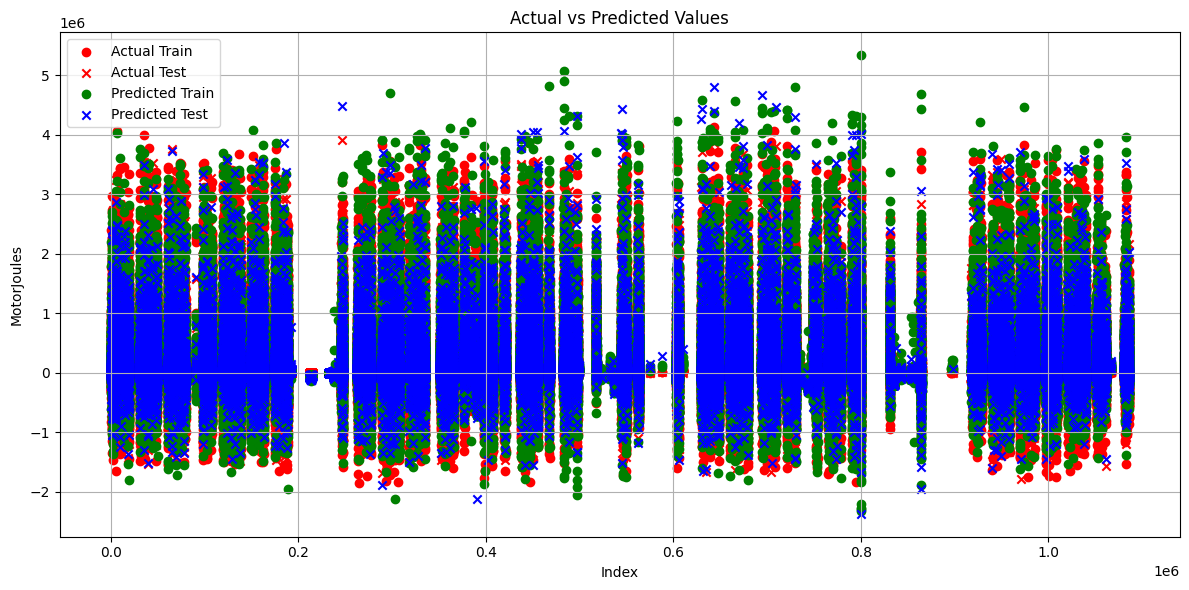

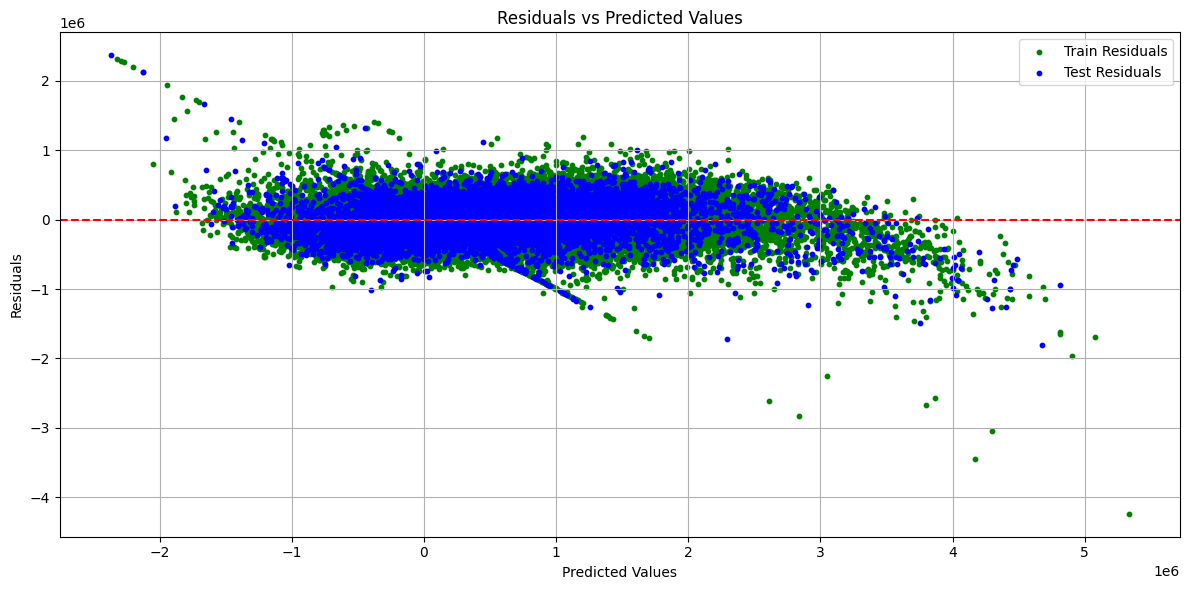

['poly_transformer.pkl']

In [44]:
#TEST MODEL


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading models

# Assuming 'df' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2023-08-31'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define the target variable
target = 'MotorJoules'

# Use all columns except 'datetime' and 'target' as features
features = filtered_df.columns.drop(['datetime', target])

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]

# Use a smaller sample of data if the dataset is very large
# For example, use only 10% of the data or a fixed number of rows
# X, y = X.sample(frac=0.1, random_state=42), y.sample(frac=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='red', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='blue', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='blue', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)


# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(PolynomialFeatures(degree=degree, include_bias=False), 'poly_transformer.pkl')


In [52]:
#APPLY MODEL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving and loading models

# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2023-08-01'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define the target variable
target = 'MotorJoules'

# Use all columns except 'datetime' and 'target' as features
features = filtered_df.columns.drop(['datetime', target])

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
degree = 2  # Change to 2 or even 1 (linear) to simplify
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  # Fit and transform on training data

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_poly = poly.transform(X_test)  # Transform test data (without fitting again)
X_test_scaled = scaler.transform(X_test_poly)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly_transformer.pkl')  # Saving the fitted polynomial transformer

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')


Train MAE: 71128.9921378981
Train MSE: 14823128023.563328
Train RMSE: 121750.26909031178
Train R²: 0.9170447424823434
Test MAE: 71103.79848162545
Test MSE: 14682041170.813719
Test RMSE: 121169.47293280481
Test R²: 0.9177525679428475


In [50]:
df1=df

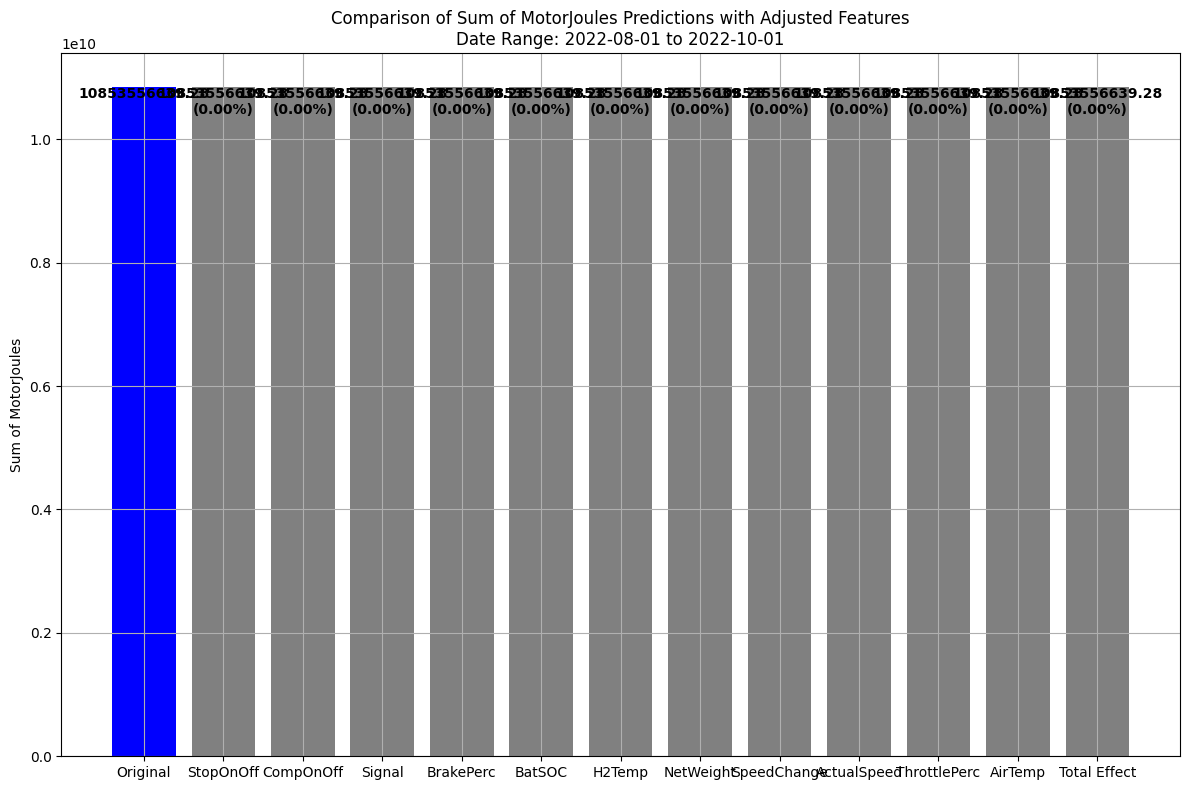

Original Sum of MotorJoules: 10853556639.28
Adjusted Sum of MotorJoules with 0% StopOnOff: 10853556639.28
Adjusted Sum of MotorJoules with 0% CompOnOff: 10853556639.28
Adjusted Sum of MotorJoules with 0% Signal: 10853556639.28
Adjusted Sum of MotorJoules with 0% BrakePerc: 10853556639.28
Adjusted Sum of MotorJoules with 0% BatSOC: 10853556639.28
Adjusted Sum of MotorJoules with 0% H2Temp: 10853556639.28
Adjusted Sum of MotorJoules with 0% NetWeight: 10853556639.28
Adjusted Sum of MotorJoules with 0% SpeedChange: 10853556639.28
Adjusted Sum of MotorJoules with 0% ActualSpeed: 10853556639.28
Adjusted Sum of MotorJoules with 0% ThrottlePerc: 10853556639.28
Adjusted Sum of MotorJoules with 0% AirTemp: 10853556639.28
Total Adjusted Sum of MotorJoules: 10853556639.28
Change in Kg of Hydrogen based on Operational Characteristics: 0.00 kg


In [73]:
#Run model for different settings in Operational Characteristics
# 
import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Function to apply the model to filtered data
def apply_model_to_filtered_data(df, start_date, end_date):
    # Filter the dataset based on the specified date range
    filtered_df = filter_by_date(df, start_date, end_date)

    # Use all columns except 'datetime' and 'MotorJoules' as features
    features = [ 'StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'TotalFCPower', 
 'FC1AirFlow', 
 'CompPower', 
 'FC3Volt', 
 'BatTotalVoltage', 
 'BatMinV', 
 'HVACDraw', 
 'BrakePerc', 
 'Signal', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange', 
]

    # Drop the 'datetime' and 'MotorJoules' columns as they are not used for prediction
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])

    # Ensure the new data has the correct feature columns
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")

    # Reorder new_data columns to match the expected order
    new_data = new_data[features]

    # Generate polynomial features using the previously fitted polynomial transformer
    new_data_poly = poly_transformer.transform(new_data)  # Transform new data to polynomial features

    # Standardize the polynomial features using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_poly)  # Scale the polynomial features

    # Make predictions on the new data
    new_predictions = model.predict(new_data_scaled)

    return new_predictions, new_data

# Function to adjust a feature by a percentage
def adjust_feature(df, feature, percentage):
    adjusted_df = df.copy()
    adjusted_df[feature] *= (1 + percentage / 100.0)
    return adjusted_df

# Specify the date range for filtering
start_date = '2022-08-01'  # Change as needed
end_date = '2022-10-01'    # Change as needed

# Apply the model to the original filtered data
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Feature adjustments in percentage
adjustment_percentages = {
     'StopOnOff': 0, 
 'CompOnOff': 0, 
   'Signal': 0, 
 'BrakePerc': 0, 
 'BatSOC': 0, 
 'H2Temp': 0, 
 'NetWeight': 0, 
 'SpeedChange': 0, 
    'ActualSpeed': 0,   # Example: increase by 10%
    'ThrottlePerc': 0,  # Example: increase by 10%
    'BrakePerc': 0,     # Example: increase by 10%
    'AirTemp': 0        # Example: increase by 10%
}

# Store the sums of predictions for each adjusted feature
adjusted_sums = {}

# Apply adjustments to each feature and predict
for feature, percentage in adjustment_percentages.items():
    adjusted_data = adjust_feature(original_data, feature, percentage)
    adjusted_data_poly = poly_transformer.transform(adjusted_data)
    adjusted_data_scaled = scaler.transform(adjusted_data_poly)
    adjusted_predictions = model.predict(adjusted_data_scaled)
    adjusted_sum = np.sum(adjusted_predictions)
    adjusted_sums[feature] = adjusted_sum

# Sum of original predictions
original_sum = np.sum(original_predictions)

# Calculate total effect of all adjustments (sequentially applying all adjustments)
total_adjusted_data = original_data.copy()
for feature, percentage in adjustment_percentages.items():
    total_adjusted_data = adjust_feature(total_adjusted_data, feature, percentage)

total_adjusted_data_poly = poly_transformer.transform(total_adjusted_data)
total_adjusted_data_scaled = scaler.transform(total_adjusted_data_poly)
total_adjusted_predictions = model.predict(total_adjusted_data_scaled)
total_adjusted_sum = np.sum(total_adjusted_predictions)

# Determine colors for individual feature bars based on the rule (green if lower, red if higher)
colors = []
for feature in adjustment_percentages:
    if adjusted_sums[feature] < original_sum:
        colors.append('green')
    elif adjusted_sums[feature] > original_sum:
        colors.append('red')
    else:
        colors.append('grey')

# Add the total effect bar color
total_color = 'green' if total_adjusted_sum < original_sum else 'red' if total_adjusted_sum > original_sum else 'grey'

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Original and individual feature adjustments
bars = plt.bar(
    ['Original'] + list(adjusted_sums.keys()) + ['Total Effect'],
    [original_sum] + list(adjusted_sums.values()) + [total_adjusted_sum],
    color=['blue'] + colors + [total_color]
)

# Add percentage difference text to bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i == 0:  # Original bar
        text = f'{yval:.2f}'
    else:
        difference = ((yval - original_sum) / original_sum) * 100
        text = f'{yval:.2f}\n({difference:.2f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, text, ha='center', va='bottom' if yval < 0 else 'top', fontsize=10, fontweight='bold')

# Add labels and title
plt.ylabel('Sum of MotorJoules')
plt.title(f'Comparison of Sum of MotorJoules Predictions with Adjusted Features\nDate Range: {start_date} to {end_date}')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Print the sums for verification
print(f"Original Sum of MotorJoules: {original_sum:.2f}")
for feature, adjusted_sum in adjusted_sums.items():
    print(f"Adjusted Sum of MotorJoules with {adjustment_percentages[feature]}% {feature}: {adjusted_sum:.2f}")

print(f"Total Adjusted Sum of MotorJoules: {total_adjusted_sum:.2f}")

# Calculate and print the change in kilograms of hydrogen
# Calculate and print the change in kilograms of hydrogen
change_in_hydrogen_kg = (original_sum - total_adjusted_sum) /(66670 * 1000) # 1 J / 66670 J/g = 0.000015 grams
print(f"Change in Kg of Hydrogen based on Operational Characteristics: {change_in_hydrogen_kg:.2f} kg")



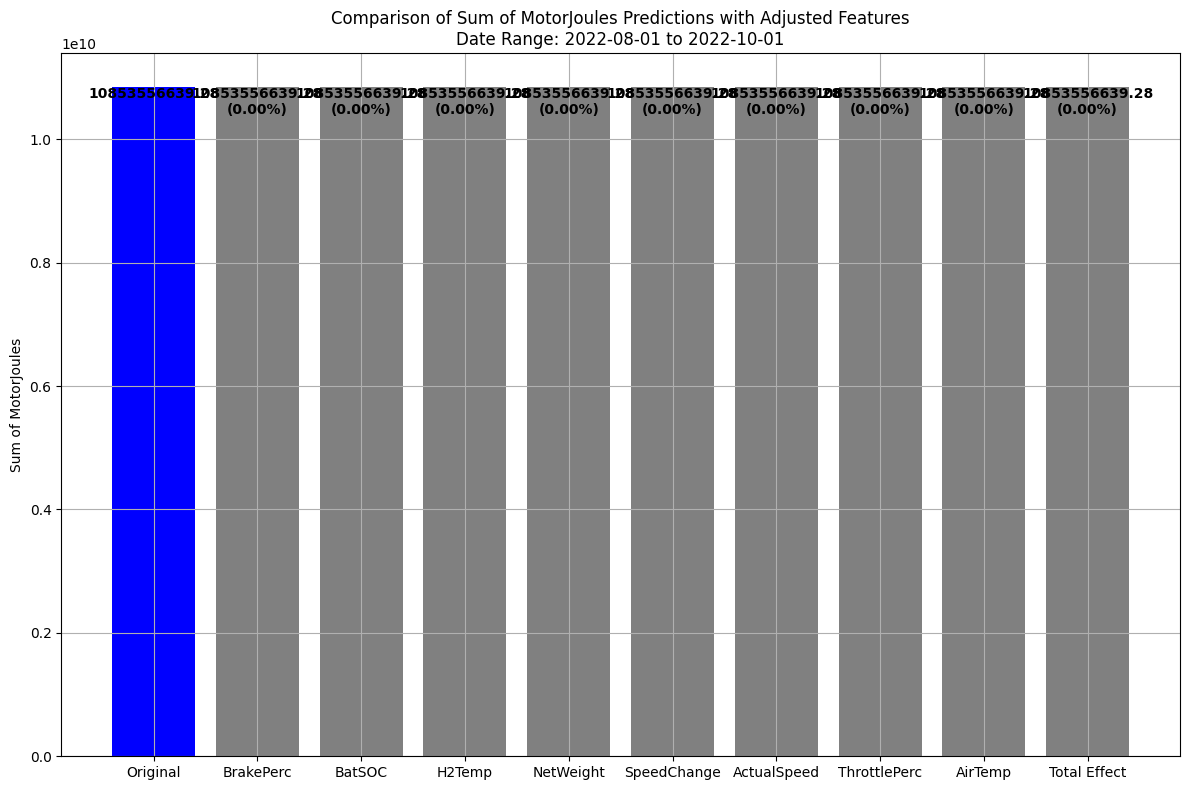

Original Sum of MotorJoules: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in BrakePerc: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in BatSOC: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in H2Temp: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in NetWeight: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in SpeedChange: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in ActualSpeed: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in ThrottlePerc: 10853556639.28
Adjusted Sum of MotorJoules with 0 change in AirTemp: 10853556639.28
Total Adjusted Sum of MotorJoules: 10853556639.28
Change in Kg of Hydrogen based on Operational Characteristics: 0.00 kg


In [81]:
#Run model for different settings in Operational Characteristics

import numpy as np
import pandas as pd
import joblib  # For loading models
import matplotlib.pyplot as plt

# Load the saved model, scaler, and polynomial transformer
model = joblib.load('polynomial_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
poly_transformer = joblib.load('poly_transformer.pkl')

# Assuming 'df1' is your DataFrame and it contains a 'datetime' column for date filtering
df1['datetime'] = pd.to_datetime(df1['datetime'])

def filter_by_date(df, start_date, end_date):
    """Filter dataframe by date range."""
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

def apply_model_to_filtered_data(df, start_date, end_date):
    """Apply the model to data filtered by date range."""
    filtered_df = filter_by_date(df, start_date, end_date)
    features = ['StopOnOff', 'ThrottlePerc', 'CompOnOff', 'TotalFCPower', 'FC1AirFlow', 'CompPower', 'FC3Volt',
                'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'BrakePerc', 'Signal', 'BatSOC', 'H2Temp', 'AirTemp',
                'H2Perc', 'ActualSpeed', 'NetWeight', 'SpeedChange']
    new_data = filtered_df.drop(columns=['datetime', 'MotorJoules'])
    missing_features = set(features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"New data is missing the following required features: {missing_features}")
    new_data = new_data[features]
    new_data_poly = poly_transformer.transform(new_data)
    new_data_scaled = scaler.transform(new_data_poly)
    new_predictions = model.predict(new_data_scaled)
    return new_predictions, new_data

start_date = '2022-08-01'
end_date = '2022-10-01'
original_predictions, original_data = apply_model_to_filtered_data(df1, start_date, end_date)

# Define adjustments for features
adjustment_percentages = {
        #'StopOnOff': 1, #Example, set to 0 for not in use, 1 for in use
    #'CompOnOff': 0,#Example, set to 0 for not in use, 1 for in use
   # 'Signal': 1,#Example, set to 0 for not in use, 1 for in use
   'BrakePerc': 0,  # Example: increase by 10%
 'BatSOC': 0,  # Example: increase by 10%
 'H2Temp': 0,  # Example: increase by 10%
 'NetWeight': 0,  # Example: increase by 10%
 'SpeedChange': 0,  # Example: increase by 10%
    'ActualSpeed': 0,   # Example: increase by 10%
    'ThrottlePerc': 0,  # Example: increase by 10%
    'AirTemp': 0        # Example: increase by 10%
}

adjusted_sums = {}
for feature, adjustment in adjustment_percentages.items():
    adjusted_data = adjust_feature(original_data, feature, adjustment)
    adjusted_data_poly = poly_transformer.transform(adjusted_data)
    adjusted_data_scaled = scaler.transform(adjusted_data_poly)
    adjusted_predictions = model.predict(adjusted_data_scaled)
    adjusted_sum = np.sum(adjusted_predictions)
    adjusted_sums[feature] = adjusted_sum

original_sum = np.sum(original_predictions)
total_adjusted_data = original_data.copy()
for feature, adjustment in adjustment_percentages.items():
    total_adjusted_data = adjust_feature(total_adjusted_data, feature, adjustment)

total_adjusted_data_poly = poly_transformer.transform(total_adjusted_data)
total_adjusted_data_scaled = scaler.transform(total_adjusted_data_poly)
total_adjusted_predictions = model.predict(total_adjusted_data_scaled)
total_adjusted_sum = np.sum(total_adjusted_predictions)

colors = ['green' if adjusted_sums[feature] < original_sum else 'red' if adjusted_sums[feature] > original_sum else 'grey' for feature in adjustment_percentages]
total_color = 'green' if total_adjusted_sum < original_sum else 'red' if total_adjusted_sum > original_sum else 'grey'

plt.figure(figsize=(12, 8))
bars = plt.bar(['Original'] + list(adjusted_sums.keys()) + ['Total Effect'], [original_sum] + list(adjusted_sums.values()) + [total_adjusted_sum], color=['blue'] + colors + [total_color])
for i, bar in enumerate(bars):
    yval = bar.get_height()
    text = f'{yval:.2f}' if i == 0 else f'{yval:.2f}\n({(yval - original_sum) / original_sum * 100:.2f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, text, ha='center', va='bottom' if yval < 0 else 'top', fontsize=10, fontweight='bold')
plt.ylabel('Sum of MotorJoules')
plt.title(f'Comparison of Sum of MotorJoules Predictions with Adjusted Features\nDate Range: {start_date} to {end_date}')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Original Sum of MotorJoules: {original_sum:.2f}")
for feature, adjusted_sum in adjusted_sums.items():
    print(f"Adjusted Sum of MotorJoules with {adjustment_percentages[feature]} change in {feature}: {adjusted_sum:.2f}")
print(f"Total Adjusted Sum of MotorJoules: {total_adjusted_sum:.2f}")

change_in_hydrogen_kg = (original_sum - total_adjusted_sum) / (66670 * 1000)
print(f"Change in Kg of Hydrogen based on Operational Characteristics: {change_in_hydrogen_kg:.2f} kg")
